In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

%matplotlib inline

In [3]:
pwd

'C:\\Users\\Administrator\\Deep learning'

In [6]:
import zipfile as zf
files = zf.ZipFile("cell_images.zip", 'r')
files.extractall('cell_images')
files.close()

In [8]:
my_data_dir='cell_images/cell_images'

In [9]:
os.listdir(my_data_dir)

['test', 'train']

In [10]:
test_path=my_data_dir+'/test/'
train_path=my_data_dir+'/train/'

In [11]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [12]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [13]:
os.listdir(train_path+'/parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [14]:
para_cell=train_path+'/parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [15]:
para_img=imread(para_cell)

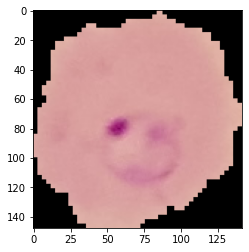

In [16]:
plt.imshow(para_img)

In [17]:
para_img.shape

(148, 142, 3)

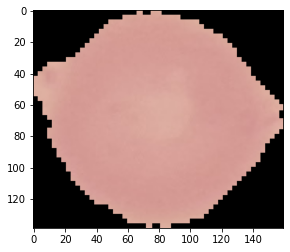

In [18]:
unifected_cell_path=train_path+'/uninfected/'+os.listdir(train_path+'/uninfected')[0]
unifected_cell=imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [19]:
len(os.listdir(train_path+'/parasitized'))

12480

In [20]:
len(os.listdir(train_path+'/uninfected'))

12480

In [21]:
unifected_cell.shape

(139, 160, 3)

In [22]:
para_img.shape

(148, 142, 3)

In [23]:
para_img.shape

(148, 142, 3)

In [27]:
dim1=[]
dim2=[]
for image_filename in os.listdir(test_path+'uninfected'):
    img=imread(test_path+'uninfected'+'/'+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


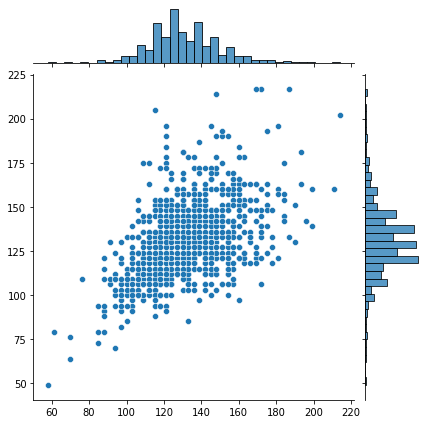

In [28]:
sns.jointplot(dim1,dim2)

In [29]:
np.mean(dim1)

130.92538461538462

In [30]:
np.mean(dim2)

130.75

In [31]:
image_shape=(130,130,3)//크기 설정

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [35]:
image_gen=ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.10,#10%
                            height_shift_range=0.10,
                            rescale=1/255,#전체크기
                            shear_range=0.1,#커팅비율
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest'
                            )

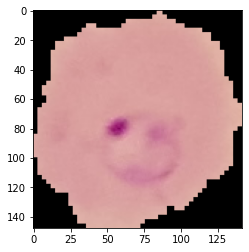

In [36]:
plt.imshow(para_img)

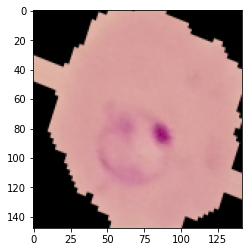

In [37]:
plt.imshow(image_gen.random_transform(para_img))#원본이미지변환

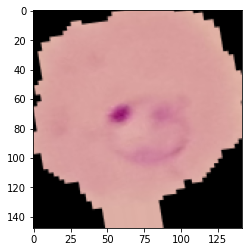

In [38]:
plt.imshow(image_gen.random_transform(para_img))

In [39]:
image_gen.flow_from_directory(train_path)#전체적으로 변환,클래스구분

Found 24958 images belonging to 2 classes.


In [40]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Conv2D,MaxPooling2D

In [46]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))#하나의 클래스 판단

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [50]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module tensorflow.python.keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Arguments:
        directory: string, path to the target directory. It should contain one
          subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside
          each of the subdirectories directory tree will be included in the
          generator. See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
              for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
         

In [51]:
batch_size=16

In [52]:
train_image_gen=image_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],#모든 트레인 이미지 130x130으로
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [53]:
test_image_gen=image_gen.flow_from_directory(test_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [54]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [55]:
import warnings

In [56]:
warnings.filterwarnings('ignore')

In [57]:
results=model.fit_generator(train_image_gen,epochs=20,
                           validation_data=test_image_gen,
                           callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1560/1560 [==============================] - 1303s 835ms/step - loss: 0.3199 - accuracy: 0.8656 - val_loss: 0.1961 - val_accuracy: 0.9392
Epoch 2/20
1560/1560 [==============================] - 946s 607ms/step - loss: 0.1894 - accuracy: 0.9423 - val_loss: 0.1932 - val_accuracy: 0.9381
Epoch 3/20
1560/1560 [==============================] - 851s 545ms/step - loss: 0.1745 - accuracy: 0.9468 - val_loss: 0.1651 - val_accuracy: 0.9465
Epoch 4/20
1560/1560 [==============================] - 861s 552ms/step - loss: 0.1654 - accuracy: 0.9489 - val_loss: 0.1670 - val_accuracy: 0.9442
Epoch 5/20
1560/1560 [==============================] - 847s 543ms/step - loss: 0.1611 - accuracy: 0.9494 - val_loss: 0.1630 - val_accuracy: 0.9431
Epoch 6/20
1560/1560 [==============================] - 831s 532ms/step - loss: 0.1555 - accuracy: 0.9515 - val_loss: 0.1568 - val_accuracy: 0.9435
Epoch 7/20
1560/1560 [=============

In [2]:
losses=pd.DataFrame(model.history.history)

NameError: name 'pd' is not defined

In [1]:
losses[['loss','val_loss']].plot()

NameError: name 'losses' is not defined

In [61]:
model.metrics_names

['loss', 'accuracy']

In [62]:
model.evaluate_generator(test_image_gen)

[0.14880059659481049, 0.9496153593063354]

In [63]:
from tensorflow.keras.preprocessing import image

In [64]:
pred_probabilties=model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [66]:
pred_probabilties

array([[1.5969038e-02],
       [4.5830011e-04],
       [4.7704577e-04],
       ...,
       [9.3554246e-01],
       [9.8293138e-01],
       [9.5007718e-01]], dtype=float32)

In [67]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [68]:
predictions=pred_probabilties>0.5 #0.5이상이면 클래스1

In [69]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [72]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1221,   79],
       [  49, 1251]], dtype=int64)

In [73]:
para_cell

'cell_images/cell_images/train//parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [76]:
my_image=image.load(para_cell,target_size=image_shape)

AttributeError: module 'tensorflow.keras.preprocessing.image' has no attribute 'load'

In [ ]:
my_image

In [ ]:
type(my_image)

In [ ]:
my_image=image.img_to_array(my_image) #이미지 어레이타입으로

In [ ]:
type(my_image)

In [ ]:
my_image.shape

In [ ]:
my_image=np.expand_dims(my_image,axis=0)

In [ ]:
my_image.shape

In [ ]:
model.predict(my_image)#감염

In [ ]:
train_image_gen.class_indices

In [ ]:
test_image_gen.class_indices

mnist

In [ ]:
from tensorflow.keras.dataset import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x_train[0]

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

In [ ]:
x_train.max()

In [ ]:
x_train=x_train/255

In [ ]:
x_test=x_test/255

In [ ]:
x_train.shape

In [ ]:
x_train=x_train.reshape(60000,28,28,1) #데이터개수, 크기

In [ ]:
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train

In [ ]:
y_cat_train=to_categorical(y_train)

In [ ]:
y_cat_test=to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(x_train,y_cat_train,epochs=10)

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x_test,y_cat_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions=model.predict_classes(x_test)

In [ ]:
y_cat_test[0]

In [ ]:
predictions[0]

In [ ]:
y_test

In [ ]:
print(classification_report(y_test,predictions))